### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# ignore warning messages
import sys
import warnings

%matplotlib inline

pd.set_option("display.max.columns", None)

if not sys.warnoptions:
    warnings.simplefilter("ignore")


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [167]:
data = pd.read_csv('data/coupons.csv')


In [168]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# Missing data
The missing or problematic data appears in age columns recorded the data type of an object variable rather than a numeric value. As a result, we must convert this object to integer values.

In [169]:
# Making a list of missing value types
# Change the age column of an object's data to a numeric value.

data.age.value_counts(dropna=False) 

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

# drop and replace
We can drop and replace the item with an integer value.

In [170]:
# replaced non-numeric to numeric values. 

data["age"].replace("50plus",51, inplace=True) 
data["age"].replace("below21",20, inplace=True)

#changed data type from object into int64.

data["age"] = data["age"].astype("int64")

data.age.value_counts(dropna=False)

21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



## The pessengers who accept the Coupon 
The dataframe below displays all of the coupon values 
for passengers who accepted or rejected it.

In [171]:
# total observation of accept or reject the coupon.

pd.crosstab(data['coupon'],data['Y'])

#pd.crosstab(data['coupon'],data['Y'], normalize = True)*100

Y,0,1
coupon,,
Bar,1190,827
Carry out & Take away,633,1760
Coffee House,2001,1995
Restaurant(20-50),834,658
Restaurant(<20),816,1970


# Accept of Coupon in  pie chart

The pie chart shows the percentage of total coupons that passengers 
have accepted or rejected.

The percentage of coupons accepted by passengers is 
shown in the pie chart below the green color.

Text(0.5, 1.0, ' Use Bar Coupon')

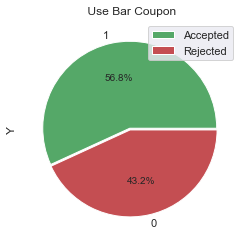

In [172]:
#the total proportion of accepting or rejecting of the coupon.

data['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['g','r'])
labels = ['Accepted','Rejected']
plt.legend(labels, loc="best") 
plt.title(" Use Bar Coupon")

5. Use a bar plot to visualize the `coupon` column.

# Bar chart of coupon column
The total value of the passengers who accepted or rejected 
the coupon is shown in the bar chart below.
# chart
In the Coffee House columns, the data shows the number of passengers who accepted or rejected the coupon are the same in count.

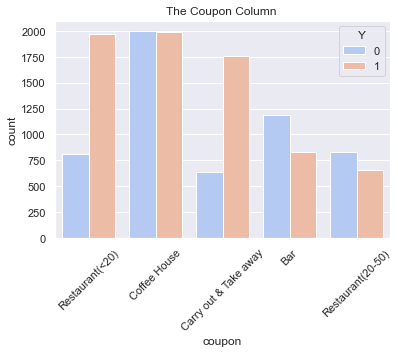

In [173]:
#The bar plot of the coupon column.
plt.title("The Coupon Column ")
sns.set(rc={'figure.figsize':(9.7,6.27)})
chart = (
    sns.countplot(data['coupon'], palette='coolwarm', hue='Y', data=data)
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);


6. Use a histogram to visualize the temperature column.

# Histogram Temperature data
The graph below shows
Even though the figure appears to be
a bar plot, it is actually a histogram. 
because data dispersion has an impact on plot visualization.


Text(0.5, 1.0, 'The Temperature In °F')

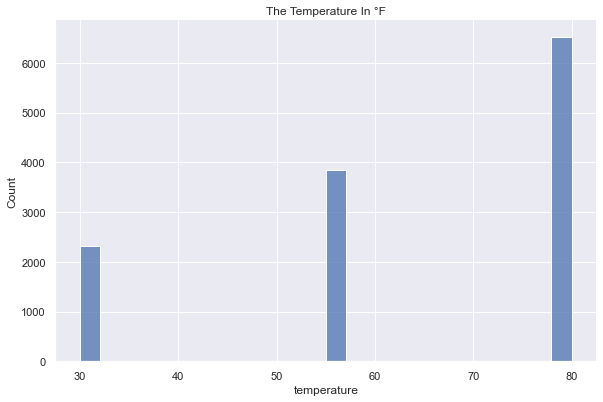

In [174]:
#The histogram of the temperature column.

sns.histplot(data=data,x="temperature", shrink=1.0)
sns.despine()
plt.title("The Temperature In °F")

#plt.hist(data["temperature"] )

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


# The dataframe of bar coupon 

The dataframe below displays all of the coupon values 
for passengers who accepted or rejected it.

In [175]:
#shows the dataframe that contains the bar coupon .
bar_coupon = data[data["coupon"] == "Bar"]

In [176]:
#shows the total number of coupon observations in each variable.
data.coupon.value_counts(dropna=False)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

2. What proportion of bar coupons were accepted?


# Bar coupon per passengers

A pie chart depicting the proportion (percentage) of bar coupons accepted by passengers is displayed below. Customers accept bar coupons at a far lower rate than those who are rejected.

Text(0.5, 1.0, 'Bar Coupon')

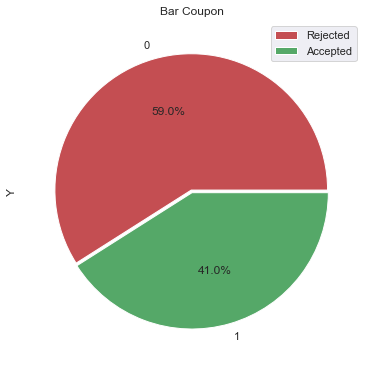

In [177]:
#Compare the passengers who accepted or rejected the coupon using bar coupon.

bar_coupon['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['r','g'])
labels = [ 'Rejected','Accepted']
plt.legend(labels, loc="best") 
plt.title("Bar Coupon")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


# Acceptance proportion of Bar Coupon per visitors
We'll compare the passengers who go to the bar fewer than three and those who go more than three of a months , as well as whether they accepted or declined the coupon.

In [178]:
#The dataframe of passengers visiting with a bar coupon fewer than three times and more than three times per month.

bar_coupon.Bar.unique()
less_than_three = bar_coupon[(bar_coupon["Bar"] == 'never') |
                             (bar_coupon["Bar"] == 'less1') | 
                              (bar_coupon["Bar"] == '1~3')]
less_than_three

more_than_three = bar_coupon[(bar_coupon["Bar"] == '4~8') |
                             (bar_coupon["Bar"] == 'gt8') ]
more_than_three.head(2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,NaN,gt8,gt8,gt8,gt8,gt8,1,0,0,1,0,1


# pie chart 

We compare the proportion(percentage)of passengers who visit the bar more than three times per month to those who come less than three times per month. On the pie chart, the red hue represents passengers who rejected the coupon, while the light blue color represents passengers who accepted the bar coupon.
As a result, compared to passengers rejected, the acceptance of bar coupon visits less than or equal to three per month is very low. On the other hand, acceptance of more than three visits each month is extremely high.

Text(0.5, 1.0, ' Visits More Than Three')

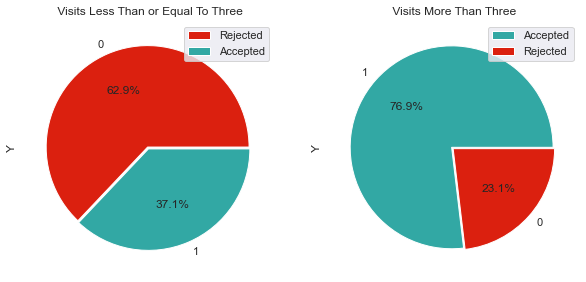

In [202]:
#Compare the passengers who accepted or rejected the coupon using bar coupon column.

plt.figure(figsize = (10,5))
plt.subplot(121)
less_than_three['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#db200f','#32a8a4'])
labels = [ 'Rejected','Accepted']
plt.legend(labels, loc="best")
plt.title(" Visits Less Than or Equal To Three")

plt.subplot(122)
more_than_three['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = [ 'Accepted','Rejected']
plt.legend(labels, loc="best")
plt.title(" Visits More Than Three")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


#  data with the age limit 

We compare the proportion(percentage)of passengers who visit the bar more than one time per month & age over 25 years old. On the pie chart, the red hue represents passengers who rejected the coupon, while the light blue color represents passengers who accepted the bar coupon.

In [180]:
#how many units of bar values in the series exists?
# indicates all the unique value contains in bar coupon using Unique method.
bar_coupon.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [181]:
# the array value of passengers over the age of 25 using bar coupon
# and visits more than once a month

more_than_once = bar_coupon[(bar_coupon["age"] > 25) & ((bar_coupon["Bar"] == '4~8') |
                             (bar_coupon["Bar"] == 'gt8') | 
                              (bar_coupon["Bar"] == '1~3'))]
more_than_once.age.unique()


array([26, 31, 51, 41, 36, 46], dtype=int64)

In [182]:
#the dataframe of passengers under the age of 25 using bar coupon and visits more than once a month.

less_than_25 = bar_coupon[(bar_coupon["age"] <= 25) & ((bar_coupon["Bar"] == '4~8') |
                             (bar_coupon["Bar"] == 'gt8') | 
                              (bar_coupon["Bar"] == '1~3'))]
less_than_25.age.unique()

array([21, 20], dtype=int64)

# compare the pie chart per passengers visits using bar coupon

The pie chart result differs from the other displayed charts in that it shows that age has no bearing on the use of a bar coupon to frequent visit the bar.
The proportion of frequent visits to the bar more than once differs little between people over 25 and those under 25.
This means that age isn't a factor.


Text(0.5, 1.0, ' Visits More Than Once & Under 25 ')

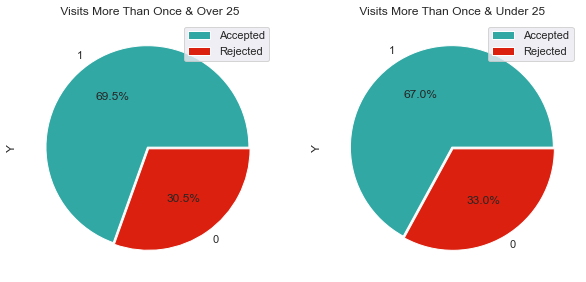

In [201]:
#Compare the passengers who accepted or rejected the coupon using age column.
plt.figure(figsize = (10,5))
plt.subplot(121)
more_than_once['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = ['Accepted', 'Rejected']
plt.legend(labels, loc="best")
plt.title(" Visits More Than Once & Over 25")

plt.subplot(122)
less_than_25['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = [ 'Accepted','Rejected']
plt.legend(labels, loc="best")
plt.title(" Visits More Than Once & Under 25 ")

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [184]:
# not included

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [185]:
#not included

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [186]:
#to determine how many units of passengers travels using unique method.
bar_coupon.passanger.unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [187]:
# to determine how many units of occupations have passengers.
bar_coupon.occupation.unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

# Visitors more than one a month
The ratio of visitors who came to the bar using a bar coupon but did not have children as passengers accepted the coupon more frequently than children did. Simultaneously, we saw that the visitors' occupations were not limited to farming, fishing, or forestry.

In [188]:
#indicates the passengers visits bar more than one, with not kids and have specific occupations.

more_than_one = bar_coupon[ (bar_coupon["Bar"] == '4~8') |
                             (bar_coupon["Bar"] == 'gt8') | 
                              (bar_coupon["Bar"] == '1~3')]
more_than_one

had_passengers = more_than_one[((more_than_one["passanger"] != 'Kid(s)') & (more_than_one["passanger"] != 'Alone')) & 
                               (bar_coupon["occupation"] != 'Farming Fishing & Forestry') ]
had_passengers.head(2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,NaN,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1


# travelers doesn't have kids as passengers

The passengers shows that travelers do not have kids are very likely to 
visit the bar more than once, and their occupation is not farming, fishing, or forestry.

Text(0.5, 1.0, ' Visits More Than One,Passenegers Not Kids')

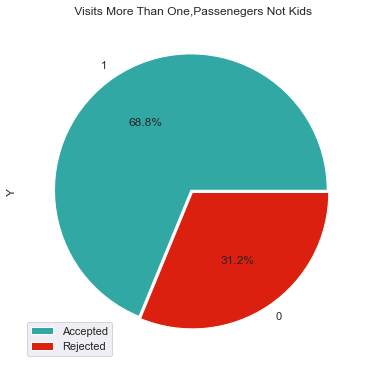

In [189]:
#pie chart Passengers who haven't been to the bar with their children have visited more than one.

more_than_one['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = ['Accepted', 'Rejected']
plt.legend(labels, loc="best")
plt.title(" Visits More Than One,Passenegers Not Kids")

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [190]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

no_kid_passenger_widow  = more_than_one[((more_than_one["passanger"] != 'Kid(s)') & 
                                (more_than_one["maritalStatus"] != 'Widowed'))]


no_kid_passenger_widow.maritalStatus.unique()

array(['Single', 'Unmarried partner', 'Married partner', 'Divorced'],
      dtype=object)

In [191]:
#go to bars more than once a month and are under the age of 30 *OR*

under_thirty = more_than_one[(bar_coupon["age"] < 30)]
under_thirty.age.unique()

array([21, 26, 20], dtype=int64)

In [192]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.

more_than_four = bar_coupon[((bar_coupon["income"] == 'Less than $12500') & 
                             (bar_coupon["income"] == '$12500 - $24999') & 
                             (bar_coupon["income"] == '$25000 - $37499') &
                             (bar_coupon["income"] == '$37500 - $49999')) & 
                            ((bar_coupon["RestaurantLessThan20"] == '4~8') & 
                             (bar_coupon["RestaurantLessThan20"] == 'gt8'))]

more_than_four.RestaurantLessThan20.unique()


# bar_coupon.RestaurantLessThan20.unique()
# bar_coupon.income.unique()

array([], dtype=object)

Text(0.5, 1.0, ' Visits More Than Once & Under 30 ')

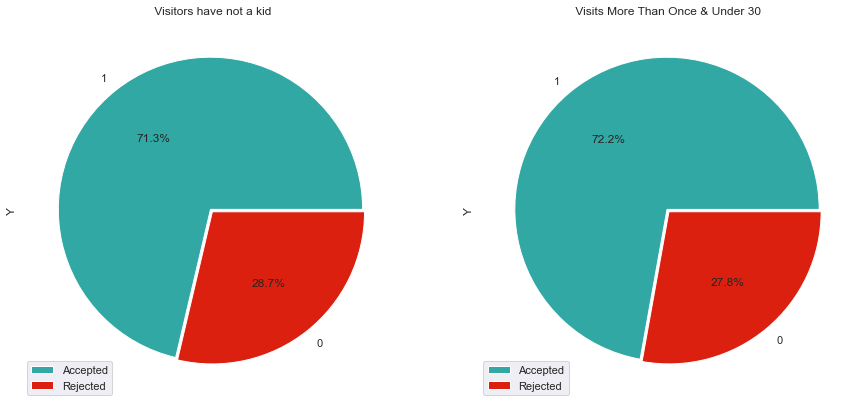

In [193]:
#pie chart Passengers who haven't been to the bar with their children have visited more than one under the age of 30.

plt.figure(figsize = (15,7))
plt.subplot(121)
no_kid_passenger_widow['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = ['Accepted', 'Rejected']
plt.legend(labels, loc="best")
plt.title(" Visitors have not a kid")

plt.subplot(122)
under_thirty['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#32a8a4','#db200f'])
labels = [ 'Accepted','Rejected']
plt.legend(labels, loc="best")
plt.title(" Visits More Than Once & Under 30 ")

# Effects of income on frequent restaurant visits

There isn't a single passenger with a monthly salary of less than $50,000 
who visits the restaurant more than four times.

This data demonstrates that income has an impact on restaurant visits.
According to the data, persons with an annual salary of less than $50,000 do not frequent visit the restaurant more than four times per month.

In [194]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.

more_than_four = bar_coupon[((bar_coupon["income"] == 'Less than $12500') & 
                             (bar_coupon["income"] == '$12500 - $24999') & 
                             (bar_coupon["income"] == '$25000 - $37499') &
                             (bar_coupon["income"] == '$37500 - $49999')) & 
                            ((bar_coupon["RestaurantLessThan20"] == '4~8') & 
                             (bar_coupon["RestaurantLessThan20"] == 'gt8'))]

more_than_four.RestaurantLessThan20.unique()

array([], dtype=object)

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In every case, the percentage of passengers who took the bar coupon was higher. 
Basically, the data demonstrates that the majority of passengers used the  bar coupon more than one.

In general, consumer rejection is higher than customer acceptance. When we look at different parts, we can see that customers who visit fewer than three times per month have a greater rejection rate, whereas customers who visit more than three times per month have a higher acceptance rate. 
When we look at the age column, we see that visitors under and over the age of 25 who are not traveling with children have a much higher acceptance rate.At the same time, no consumer with an income of less than $50,000 visits a bar coupon more than four times.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Investigate Coffee House Coupon
With a visit to the Coffee House, we can observe the total acceptance or rejection of the coupon. The coffee shop coupon holders are very closely & evenly divided. Similarly, travelers who accepted RestaurantLessThan20 less than three trips each month had a somewhat greater rate of acceptance than total Coffee House coupon holders.
On the 



In [195]:
#shows the dataframe that contains the coffee house coupon only.
coffee_coupon = data[data["coupon"] == "Coffee House"]
coffee_coupon.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# Coffee House coupon per passengers
On the pie chart below, the proportion (percentage) of coffee house coupon accepted or rejected by travelers is almost evenly distributed. However,the rejected value of the Coffee House coupon is slightly edge out the accepted coupon by the margin of 0.01%.

Text(0.5, 1.0, ' Coffee House')

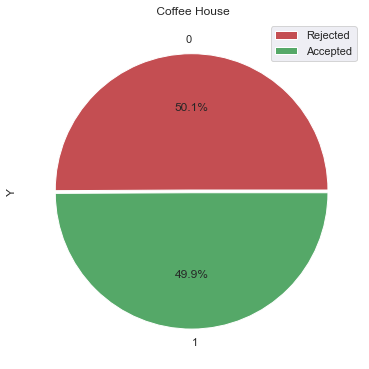

In [196]:
# Describe the ratio of Coffee House coupon accepted by passengers.
coffee_coupon['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['r','g'])
labels = [ 'Rejected','Accepted']
plt.legend(labels, loc="best") 
plt.title(" Coffee House")

The description of Coffee House coupon holders who visit the restaurant less than three times per month.

In [197]:
#Describe a Coffee House visitors visits to RestaurantLessThan20 fewer than three a month?

coffee_coupon = data[data["coupon"] == "Coffee House"]
coffee = coffee_coupon[(coffee_coupon["RestaurantLessThan20"] == 'never') |
                             (coffee_coupon["RestaurantLessThan20"] == 'less1') | 
                              (coffee_coupon["RestaurantLessThan20"] == '1~3')]
coffee.RestaurantLessThan20.unique()


array(['1~3', 'less1', 'never'], dtype=object)

Text(0.5, 1.0, ' Coffee House')

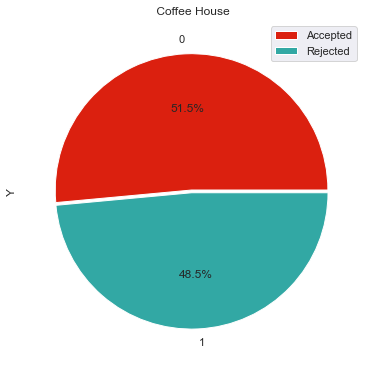

In [198]:
#Find the proportion of passengers visits RestaurantLessThan20 less than three a month?
coffee['Y'].value_counts().plot(kind = "pie", 
                                     explode = [0.01,0.01], 
                                     autopct = "%1.1f%%", colors = ['#db200f','#32a8a4'])
labels = ['Accepted','Rejected']
plt.legend(labels, loc="best")
plt.title(" Coffee House")

# Histogram with Coffee House coupon

Even though the histogram plot shows that more people visit the Coffee House more than once and fewer than three times per month, the number of coupons accepted or rejected is the same.

Text(0.5, 1.0, 'Coffee House')

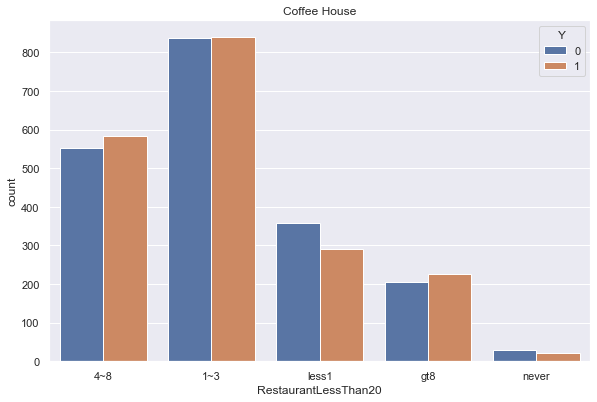

In [199]:
#Find a histogram of visitors to RestaurantlessThan20 using a Coffee House coupon that has been accepted or rejected?

sns.countplot("RestaurantLessThan20",data = coffee_coupon, hue='Y')
plt.title("Coffee House")

# Coffee House coupon with frequency distribution

The histogram with frequency distribution result shown below is comparable to the single histogram plot shown above. The histogram and frequency distribution show that the visitors who accepted or declined the coffee shop coupon were evenly dispersed.

<AxesSubplot:title={'center':'Coffee House'}, xlabel='Y', ylabel='Density'>

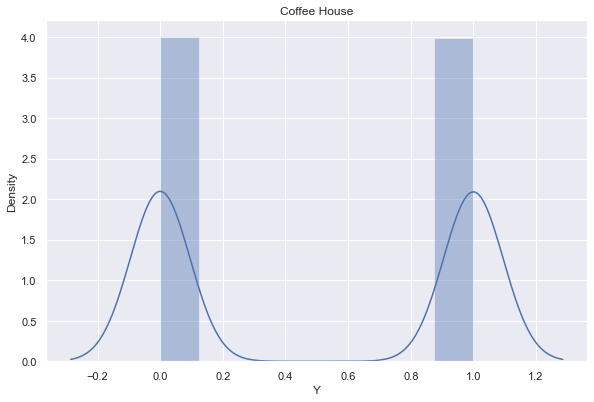

In [200]:
#show histogram plot with density distribution.
plt.title("Coffee House")
sns.distplot(coffee_coupon["Y"])